# TP07 : Forêt aléatoire (Random forest)

Dans ce TP, notre but est d'examiner un problème parmi ceux des arbres de décision.
On essayera de régler ce problème avec paramétrage. 
Ensuite, on intoduira les forêts aléatoires.

Ce TP ne contient aucune partie "programmation". 
Vous devez seulement analyser les résultats obtenues (et apprendre bien sûr).

## I- Arbre de décision 

Ici, on reprend les arbres de décision pour indiquer un des problèmes qui peuvent se passer dans ce type d'apprentissage. 


### I-1- Préparation des données

Nous utilisons le dataset [Cars Data](https://www.kaggle.com/abineshkumark/carsdata) pour classer les voitures en trois classes : US., Euroupe. ou Japan. 

**Rien à analyser ici**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

# Lecture du dataset
cars_data = pd.read_csv('datasets/cars.csv', skipinitialspace=True)
# On a remarqué que le type de cette caractéristique n'est pas bien détecté
cars_data["cubicinches"] = pd.to_numeric(cars_data["cubicinches"])
# supprimer les valeurs absentes 
cars_data.dropna(inplace=True)
# Yay! We did it! Voici les premières lignes du dataset
cars_data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [2]:
#juste pour vérifier si tous les types sont numériques
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 260
Data columns (total 8 columns):
mpg            256 non-null float64
cylinders      256 non-null int64
cubicinches    256 non-null float64
hp             256 non-null int64
weightlbs      256 non-null float64
time-to-60     256 non-null int64
year           256 non-null int64
brand          256 non-null object
dtypes: float64(3), int64(4), object(1)
memory usage: 18.0+ KB


In [3]:
# division en X et Y
X = cars_data.values[:, :-1]
Y = cars_data.values[:,-1]

Y[:10]

array(['US.', 'Europe.', 'US.', 'US.', 'US.', 'US.', 'US.', 'US.',
       'Europe.', 'Japan.'], dtype=object)

### I-2- Entraînement et test

Nous entraînons deux modèles des arbres de décision en utilisant [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) de scikit-learn : 
- *cart* : les paramètres par défaut de scikit-learn (Gini et 2 échantillons min dans une feuille)
- *cart7* : Gini, et nous avons fixé la profondeur max par 7

Ici, nous utilisons la métrique "accuracy" puisque dans le cas de classement multiclasses, accuracy = précision = rappel. Voir [ce blog](https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/) pour savoir pourquoi R=P dans le classement multinomial


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import timeit
from sklearn.metrics import accuracy_score

NBR_RUN = 7

temps_train = {
    "cart" : [],
    "cart7": []
}

conv = {# pour tester la convergence du modèle
    "cart" : [],
    "cart7": []
}


temps_test = {
    "cart" : [],
    "cart7": []
}


perf = {# pour tester la performance sur des données de test
    "cart": [],
    "cart7": []
    
}


for run in range(NBR_RUN): 
    # prétaitement des données
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3) # 30% données de test
    
    # ==================================
    # ENTRAINEMENT 
    # ==================================
    
    #entrainement CART
    cart = DecisionTreeClassifier() # un classifieur CART
    temps_debut = timeit.default_timer()
    cart.fit(X_train, Y_train)
    temps_train["cart"].append(timeit.default_timer() - temps_debut)
    
    #entrainement CART7
    cart7 = DecisionTreeClassifier(max_depth=7) # un classifieur CART avec profondeur max de 7
    temps_debut = timeit.default_timer()
    cart7.fit(X_train, Y_train)
    temps_train["cart7"].append(timeit.default_timer() - temps_debut)
    
    
    Y_cart_train = cart.predict(X_train)
    conv["cart"].append(accuracy_score(Y_train, Y_cart_train))
    Y_cart7_train = cart7.predict(X_train)
    conv["cart7"].append(accuracy_score(Y_train, Y_cart7_train))
    
    
    # ==================================
    # TEST 
    # ==================================
    
    #test CART
    temps_debut = timeit.default_timer()
    Y_cart_test = cart.predict(X_test)
    temps_test["cart"].append(timeit.default_timer() - temps_debut)
    
    #test CART7
    temps_debut = timeit.default_timer()
    Y_cart7_test = cart7.predict(X_test)
    temps_test["cart7"].append(timeit.default_timer() - temps_debut)
    
    perf["cart"].append(accuracy_score(Y_test, Y_cart_test))
    perf["cart7"].append(accuracy_score(Y_test, Y_cart7_test))
    
    
# Marche seulement sur sklearn 0.22; si vous utilisez Python < 3.5 probablement vous avez la version 0.20
# Voici la prondeur max des deux arbres (dernier RUN)
cart.get_depth(), cart7.get_depth()

(11, 7)

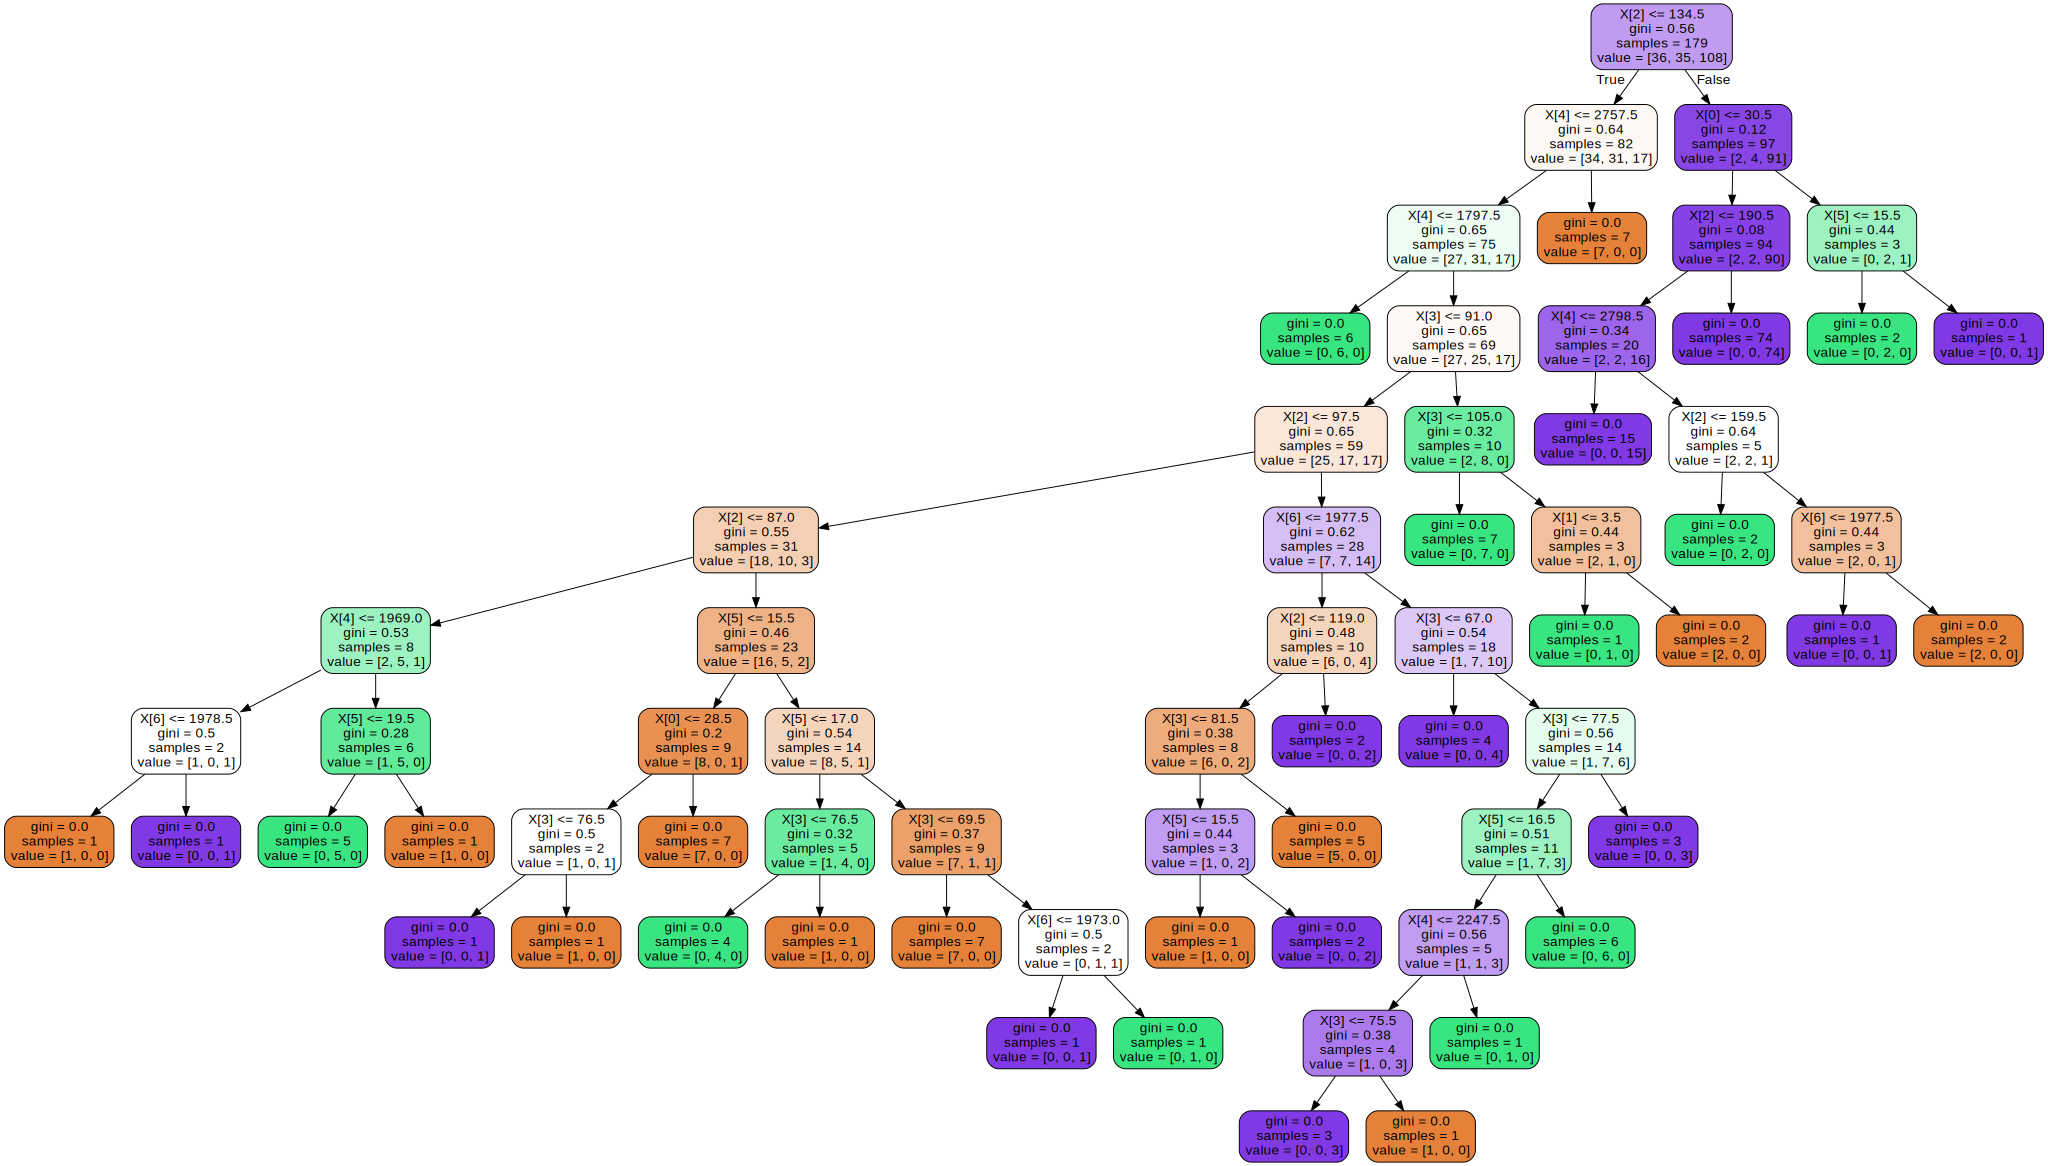

In [5]:
# ça c'est juste pour visualiser l'arbre CART (non limité par la profondeur)
# c'est un grand arbre
# vous n'avez pas besoin de ça dans l'analyse

from sklearn.tree import export_graphviz
from IPython.display import SVG, display
from graphviz import Source

graph = export_graphviz(cart, rounded = True, proportion = False, precision = 2, filled = True)
graph = Source(graph)
display(SVG(graph.pipe(format='svg')))

### I-3- Analyse de l'étape d'entrainement

**Analyser les résultats ci-après**
- Temps d'entrainement (min is better)
- Convergence du modèle. Je n'ai pas pu trouver une traduction exacte en français, donc : "how well the model fit the data." (max is better)

Ici, nous avons dessiné les métriques par rapport aux runs. 
L'ordre des runs n'est pas important.
Le plus important c'est que un modèle doit être stable par rapport un autre sur les différents runs, sinon il y a une problème quelque part.

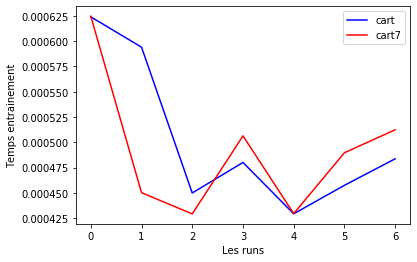

In [6]:
# Le temps d'entraînement 
#pd.DataFrame(temps_train)

plt.plot(range(NBR_RUN), temps_train["cart"], color="blue", label="cart")
plt.plot(range(NBR_RUN), temps_train["cart7"], color="red", label="cart7")
plt.ylabel("Temps entrainement")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

### Analyse du temps d'entrainement : 
D'apres le graphe ci dessus representant le temps d'entrainement des 2 models cart et cart7 d'apres les differents RUN, on remarque que cart 7 ayant au maximum une profondeur égale a 7 consomme en général moins de temps d'entrenaiment relativement a cart qui, dans notre cas a une profondeur de 10 car cart est plus volumineux que cart7 

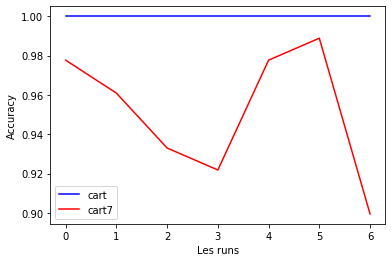

In [7]:
# La convergence
#pd.DataFrame(conv)

plt.plot(range(NBR_RUN), conv["cart"], color="blue", label="cart")
plt.plot(range(NBR_RUN), conv["cart7"], color="red", label="cart7")
plt.ylabel("Accuracy")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

### Analyse de la convergence : 
D'apres le graphe ci dessus representant the accuracy des 2 models cart et cart7 d'apres les differents RUN, on remarque que cart converge toujour mieux par rapport a cart 7 car ce premier n'a pas de profondeur limité contrairement a cart 7 

### I-4- Analyse de l'étape de test

**Analyser les résultats ci-après**
- Temps de test 
- Performance sur des données de test

On veut savoir, aussi, si la meilleure convergence assure une meilleure classification dans le test. 
Si ce n'ai pas le cas, quel est le problème dans le cas du modèle "cart" ?

Ici, nous avons dessiné les métriques par rapport aux runs. 
L'ordre des runs n'est pas important.
Le plus important c'est qu'un modèle doit être stable par rapport un autre sur les différents runs

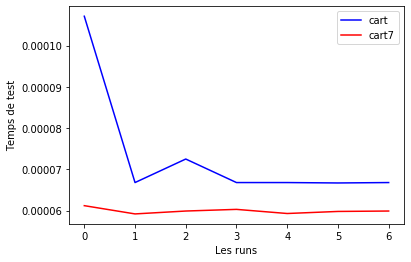

In [8]:
# Le temps de prédiction
#pd.DataFrame(temps_test)

plt.plot(range(NBR_RUN), temps_test["cart"], color="blue", label="cart")
plt.plot(range(NBR_RUN), temps_test["cart7"], color="red", label="cart7")
plt.ylabel("Temps de test")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

### Analyse du temps de test : 
D'apres le graphe ci dessus representant le temps de test des 2 models cart et cart7 d'apres les differents RUN, on remarque que cart 7 prends en général beaucoup moins de temps pour le test par rapport a cart car cart7 est moins volumineux a cause de sa profondeur maximale qui ne dépasse pas 7.

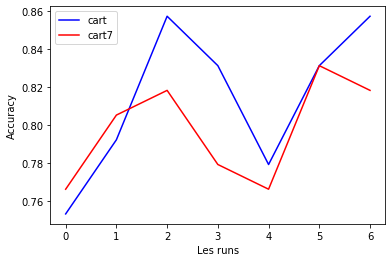

In [9]:
# La performance
#pd.DataFrame(perf)

plt.plot(range(NBR_RUN), perf["cart"], color="blue", label="cart")
plt.plot(range(NBR_RUN), perf["cart7"], color="red", label="cart7")
plt.ylabel("Accuracy")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

### Analyse de la performance du test : 
D'apres le graphe ci dessus representant the Accuracy du test des 2 models cart et cart7 d'apres les differents RUN, on remarque que cart performe mieux que cart7 surtout aprés le premier RUN

## II- Forêt aléatoire

Voici les étapes de base impliquées dans l'exécution de l'algorithme de forêt aléatoire:

- Choisissez N enregistrements aléatoires dans le jeu de données.
- Construisez un arbre de décision basé sur ces N enregistrements.
- Choisissez le nombre d'arbres souhaité dans votre algorithme et répétez les étapes 1 et 2.
- Le résultat :
   - En cas de régression, pour un nouvel enregistrement, chaque arbre de la forêt prédit une valeur pour Y (sortie). La valeur finale peut être calculée en prenant la moyenne de toutes les valeurs prédites par tous les arbres en forêt. 
   - En cas de classification, chaque arbre de la forêt prédit la catégorie à laquelle appartient le nouvel enregistrement. Enfin, le nouvel enregistrement est attribué à la catégorie qui remporte le vote à la majorité.


### II-1- Préparation des données

Nous utilisons le même dataset qu'avant 

### II-2- Entraînement et test

Nous entraînons deux modèles des arbres de décision avec [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) de scikit-learn : 
- *cart_2* : les paramètres par défaut de scikit-learn (Gini et 2 échantillons min dans une feuille)
- *cart7_2* : Gini par défaut, et nous avons fixé la profondeur max par 7

Aussi, nous utilisons [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) pour entrainer un modèle : 
- *foret* : Gini par défaut, 100 arbres dans le forêt

En plus, on veut comparer les forêts avec d'autres algorithmes de classification. Les modèles sont les suivants : 
- *nb* : Naive Bayes. Le modèle est [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) destiné aux valeurs numériques
- *rl* : Régression logistique. Le modèle est [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB # pour les valeurs numériques
from sklearn.linear_model import LogisticRegression

NBR_RUN_2 = 7

temps_train_2 = {
    "cart_2" : [],
    "cart7_2": [],
    "nbayes": [],
    "reglog": [],
    "foret": []
}

conv_2 = {# pour tester la convergence du modèle
    "cart_2" : [],
    "cart7_2": [],
    "nbayes": [],
    "reglog": [],
    "foret": []
}


temps_test_2 = {
    "cart_2" : [],
    "cart7_2": [],
    "nbayes": [],
    "reglog": [],
    "foret": []
}


perf_2 = {# pour tester la performance sur des données de test
    "cart_2": [],
    "cart7_2": [],
    "nbayes": [],
    "reglog": [],
    "foret": []
}

# cette fonction utilise les variables globales ci-avant
def evaluer(nom_modele, modele, X_train, Y_train, X_test, Y_test):
    # temps entrainement
    temps_debut = timeit.default_timer()
    modele.fit(X_train, Y_train)
    temps_train_2[nom_modele].append(timeit.default_timer() - temps_debut)
    
    # converence
    Y_modele_train = modele.predict(X_train)
    conv_2[nom_modele].append(accuracy_score(Y_train, Y_modele_train))
    
    # temps de test
    temps_debut = timeit.default_timer()
    Y_modele_test = modele.predict(X_test)
    temps_test_2[nom_modele].append(timeit.default_timer() - temps_debut)
    
    # performance
    perf_2[nom_modele].append(accuracy_score(Y_test, Y_modele_test))
    

for run in range(NBR_RUN_2): 
    # prétaitement des données
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3) # 30% données de test
    
    cart_2 = DecisionTreeClassifier() # un classifieur CART
    evaluer("cart_2", cart_2, X_train, Y_train, X_test, Y_test)
    
    cart7_2 = DecisionTreeClassifier(max_depth=7) # un classifieur CART avec profondeur max de 7
    evaluer("cart7_2", cart7_2, X_train, Y_train, X_test, Y_test)
    
    nb = GaussianNB() # un classifieur Naive Bayes pour les caractéristiques numériques
    evaluer("nbayes", nb, X_train, Y_train, X_test, Y_test)
    
    rl = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000) # un classifieur de régression logistique
    evaluer("reglog", rl, X_train, Y_train, X_test, Y_test)
    
    foret = RandomForestClassifier(n_estimators=100, random_state=0) # un classifieur de foret avec 100 arbres
    evaluer("foret", foret, X_train, Y_train, X_test, Y_test)
    
print("FIN EVALUATION")
# Ignorer le warning. Par défaut nombre des itérations de la régression logistique est 100
# j'ai mis 1000 et le warning persiste

D:\conda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\conda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\conda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\conda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\conda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\conda\lib\site-packages\sklearn\linear_model\logistic.py:947: Conve

FIN EVALUATION


D:\conda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### II-3- Analyse de l'étape d'entraînement

**Analyser les résultats ci-après**
- Temps d'entraînement 
- Convergence du modèle.

On veut comparer les forêts avec les arbres. Aussi, on veut les comparer avec les autres algorithmes de classement.

Ici, nous avons dessiné les métriques par rapport aux runs. 
L'ordre des runs n'est pas important.
Le plus important c'est que un modèle doit être stable par rapport un autre sur les différents runs

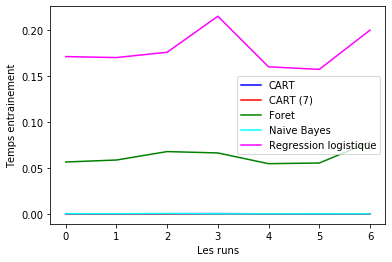

In [11]:
# Le temps d'entraînement 
pd.DataFrame(temps_train_2)
# les temps d'entraînement des forêts et de régression logistique
# sont telement grands, on ne peut pas comparer entre les autres dans un graphique

plt.plot(range(NBR_RUN_2), temps_train_2["cart_2"], color="blue", label="CART")
plt.plot(range(NBR_RUN_2), temps_train_2["cart7_2"], color="red", label="CART (7)")
plt.plot(range(NBR_RUN_2), temps_train_2["foret"], color="green", label="Foret")
plt.plot(range(NBR_RUN_2), temps_train_2["nbayes"], color="cyan", label="Naive Bayes")
plt.plot(range(NBR_RUN_2), temps_train_2["reglog"], color="magenta", label="Regression logistique")
plt.ylabel("Temps entrainement")
plt.xlabel("Les runs")
plt.legend()
plt.rcParams["figure.figsize"] = (3,7)
plt.show()

### Analyse du temps d'entraienement : 
D'apres le graphe ci dessus representant le temps d'entrainement des models: CART, CART 7, RANDOM FOREST, NAIVE BAYES et LOGISTIC REGRESSION d'apres les differents RUN, on remarque que les models qui ne consomme pas beaucoup de temps durant l'entrainement sont : naive bayes, cart et cart 7 suivie de random forest et enfin la regression logistique qui est la plus lente 

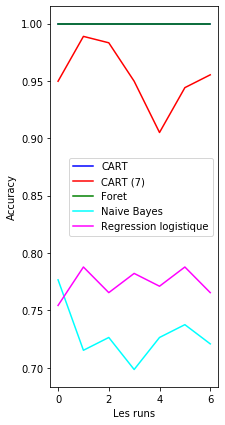

In [12]:
# La convergence
#pd.DataFrame(conv_2)

plt.plot(range(NBR_RUN_2), conv_2["cart_2"], color="blue", label="CART")
plt.plot(range(NBR_RUN_2), conv_2["cart7_2"], color="red", label="CART (7)")
plt.plot(range(NBR_RUN_2), conv_2["foret"], color="green", label="Foret")
plt.plot(range(NBR_RUN_2), conv_2["nbayes"], color="cyan", label="Naive Bayes")
plt.plot(range(NBR_RUN_2), conv_2["reglog"], color="magenta", label="Regression logistique")
plt.ylabel("Accuracy")
plt.xlabel("Les runs")
plt.legend()
plt.show()

### Analyse du l'accuracy : 
D'apres le graphe ci dessus representant l'accuracy des models: CART, CART 7, RANDOM FOREST, NAIVE BAYES et LOGISTIC REGRESSION d'apres les differents RUN, on remarque que CART et Random forest sont les plus performant suivie de CART 7 car celui ci n'est pas assez profond suivie de la regression logistique et enfin naive bayes qui s'avère être le moins adéquat dans ce cas.

### II-4- Analyse de l'étape de test

**Analyser les résultats ci-après**
- Temps de test 
- Performance sur des données de test

On veut savoir si les forêts ont réglé le problème des arbres de décision. Aussi, on veut les comparer avec les autres algorithmes de classement.

Ici, nous avons dessiné les métriques par rapport aux runs. 
L'ordre des runs n'est pas important.
Le plus important c'est que un modèle doit être stable par rapport un autre sur les différents runs

In [13]:
# Le temps de prédiction
pd.DataFrame(temps_test_2)

,cart_2,cart7_2,nbayes,reglog,foret
0,0.000077,0.000109,0.000168,0.000086,0.005576
1,0.000069,0.000069,0.000142,0.000177,0.005059
2,0.000070,0.000069,0.000235,0.000201,0.005723
3,0.000081,0.000076,0.000154,0.000089,0.005054
4,0.000072,0.000070,0.000144,0.000081,0.004786
5,0.000071,0.000070,0.000144,0.000144,0.004801
6,0.000070,0.000070,0.000171,0.000091,0.007514


### Analyse du temps de test : 
D'apres le tableau on remarque que les 2 models CART sont ceux qui consomme le moins de temps suivis des models naive bayes et regression logistique.
Randome Forest consomme beaucoup de temps par rapport a tous les models précédent car c'est un modéle relativement volumineux (on utilise ici 100 arbres dans la foret)

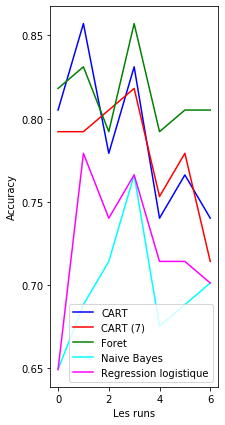

In [14]:
# La performance
#pd.DataFrame(perf_2)

plt.plot(range(NBR_RUN_2), perf_2["cart_2"], color="blue", label="CART")
plt.plot(range(NBR_RUN_2), perf_2["cart7_2"], color="red", label="CART (7)")
plt.plot(range(NBR_RUN_2), perf_2["foret"], color="green", label="Foret")
plt.plot(range(NBR_RUN_2), perf_2["nbayes"], color="cyan", label="Naive Bayes")
plt.plot(range(NBR_RUN_2), perf_2["reglog"], color="magenta", label="Regression logistique")
plt.ylabel("Accuracy")
plt.xlabel("Les runs")
plt.legend()
plt.show()

### Analyse du l'accuracy : 
D'apres le graphe ci dessus representant l'accuracy des models: CART, CART 7, RANDOM FOREST, NAIVE BAYES et LOGISTIC REGRESSION dans la phase test d'apres les differents RUN, on remarque que Random forest a généralement la meilleure perfermence a travers les run meme si CART a un pick d'accuracy plus grand, ceci revient au faite que le model random forest regle le probléme d'overfiting chez les arbres de décision, les arbres CART notament. 
Pour naive bayes et regression logistique, leur accuracy est plutot mauvaise par rapport au 2 arbres et a la foret

### II-5- Analyse de l'effet du nombre des arbres dans un forêt

Ici, le nombre des arbres dans le forêt est varié de 10 à 100 avec un pas de 5. 

**Analyser les résultats ci-après** 
- Temps d'entraînement par rapport au nombre des arbres
- La convergence par rapport au nombre des arbres
- Le temps de prédiction ar rapport au nombre des arbres
- La performance par rapport au nombre des arbres


In [15]:
# ICI, on ne va pas appliquer plusieurs RUNs
nbrs_arbres = range(10, 101, 5)

foret_nbr_temps_train = [] # le temps d'entraînement des forêts par rapport au nombre de leurs arbres
foret_nbr_conv = [] # la convergence des forêts par rapport au nombre de leurs arbres

foret_nbr_temps_test = [] # le temps de prédiction des forêts par rapport au nombre de leurs arbres
foret_nbr_perf = [] # la performance des forêts par rapport au nombre de leurs arbres


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3) # 30% données de test

for nbr_arbres in nbrs_arbres: 
    foret_nbr = RandomForestClassifier(n_estimators=nbr_arbres, random_state=0) # créer un forêt avec le nombre des arbres
    
    # temps entrainement
    temps_debut = timeit.default_timer()
    foret_nbr.fit(X_train, Y_train)
    foret_nbr_temps_train.append(timeit.default_timer() - temps_debut)
    
    # converence
    Y_foret_nbr_train = foret_nbr.predict(X_train)
    foret_nbr_conv.append(accuracy_score(Y_train, Y_foret_nbr_train))
    
    # temps de test
    temps_debut = timeit.default_timer()
    foret_nbr_test = foret_nbr.predict(X_test)
    foret_nbr_temps_test.append(timeit.default_timer() - temps_debut)
    
    # performance
    foret_nbr_perf.append(accuracy_score(Y_test, foret_nbr_test))
    
print("FIN EVALUATION")

FIN EVALUATION


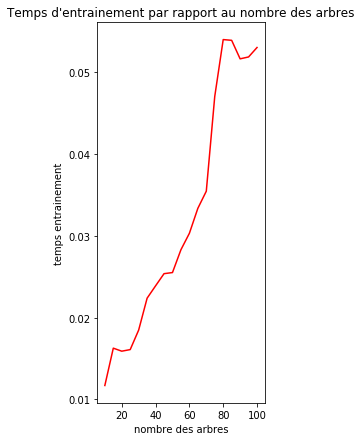

In [16]:

plt.plot(nbrs_arbres, foret_nbr_temps_train, color="red")
plt.ylabel("temps entrainement")
plt.xlabel("nombre des arbres")
plt.title("Temps d'entrainement par rapport au nombre des arbres")
plt.show()

### Analyse du temps d'entrainement par rappor au nombres d'arbre : 
D'aprés le graphe on remarque que le plus d'arbre notre foret contient, le plus de temps est consommé pour l'entrainement


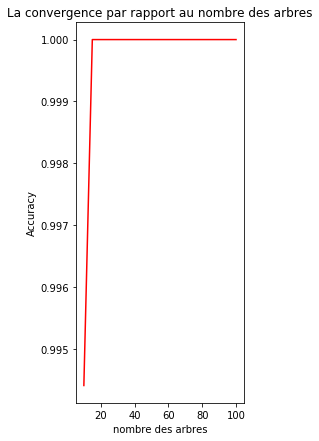

In [17]:
plt.plot(nbrs_arbres, foret_nbr_conv, color="red")
plt.ylabel("Accuracy")
plt.xlabel("nombre des arbres")
plt.title("La convergence par rapport au nombre des arbres")
plt.show()

### Analyse de la convergenece par rapport au nombre d'arbres:
La convergence augmente linairement jusqu'à atteindre 1 ie 100% occuracy. au-delà de ce seuil, elle reste stable, utilisé plus d'arbres est insignifiant, dans notre cas l'utilisation de plus de 40 arbre revient a perdre plus de temps seulement.

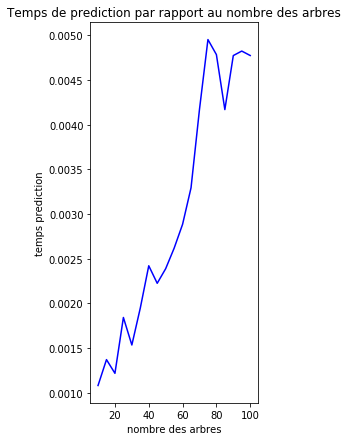

In [18]:
# Le temps de prédication
plt.plot(nbrs_arbres, foret_nbr_temps_test, color="blue")
plt.ylabel("temps prediction")
plt.xlabel("nombre des arbres")
plt.title("Temps de prediction par rapport au nombre des arbres")
plt.show()

### Analyse du temps de prédiction par rappor au nombres d'arbre : 
D'aprés le graphe on remarque que le plus d'arbre notre foret contient, le plus de temps est consommé pour la prédiction aussi


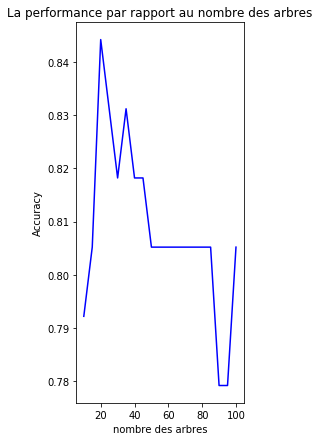

In [19]:
plt.plot(nbrs_arbres, foret_nbr_perf, color="blue")
plt.ylabel("Accuracy")
plt.xlabel("nombre des arbres")
plt.title("La performance par rapport au nombre des arbres")
plt.show()

### Analyse de la performance par rappor au nombres d'arbre : 
D'aprés le graphe on remarque que la performance augmente est arrivé a un certain seuil elle commence a diminuer


### II-6- Analyse de l'effet de la profondeur max des arbres dans un forêt

Ici, la profondeur des arbres dans le foret est variée de 1 à 10 avec un pas de 1. 

**Analyser les résultats ci-après** 
- Temps d'entraînement par rapport au nombre des arbres
- La convergence par rapport au nombre des arbres
- Le temps de prédiction ar rapport au nombre des arbres
- La performance par rapport au nombre des arbres

In [20]:
# ICI, on ne va pas appliquer plusieurs RUNs
profs_arbres = range(1, 11)
print(profs_arbres)

foret_prof_temps_train = [] # le temps d'entraînement des forêts par rapport à la profondeur de leurs arbres
foret_prof_conv = [] # la convergence des forêts par rapport à la profondeur de leurs arbres

foret_prof_temps_test = [] # le temps de prédiction des forêts par rapport à la profondeur de leurs arbres
foret_prof_perf = [] # la performance des forêts par rapport à la profondeur de leurs arbres


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3) # 30% données de test

for prof_arbres in profs_arbres: 
    foret_prof = RandomForestClassifier(n_estimators=40, random_state=0, max_depth=prof_arbres)
    
    # temps entrainement
    temps_debut = timeit.default_timer()
    foret_prof.fit(X_train, Y_train)
    foret_prof_temps_train.append(timeit.default_timer() - temps_debut)
    
    # converence
    Y_foret_prof_train = foret_prof.predict(X_train)
    foret_prof_conv.append(accuracy_score(Y_train, Y_foret_prof_train))
    
    # temps de test
    temps_debut = timeit.default_timer()
    foret_prof_test = foret_prof.predict(X_test)
    foret_prof_temps_test.append(timeit.default_timer() - temps_debut)
    
    # performance
    foret_prof_perf.append(accuracy_score(Y_test, foret_nbr_test))
    
print("FIN EVALUATION")

range(1, 11)
FIN EVALUATION


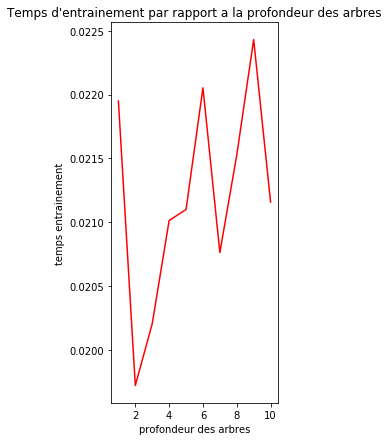

In [21]:
plt.plot(profs_arbres, foret_prof_temps_train, color="red")
plt.ylabel("temps entrainement")
plt.xlabel("profondeur des arbres")
plt.title("Temps d'entrainement par rapport a la profondeur des arbres")
plt.show()

### Analyse du temps d'entrainement par rappor a la profondeur d'arbre : 
D'aprés le graphe on remarque que le plus nos arbres sont profonds, le plus de temps est consommé pour l'entrainement


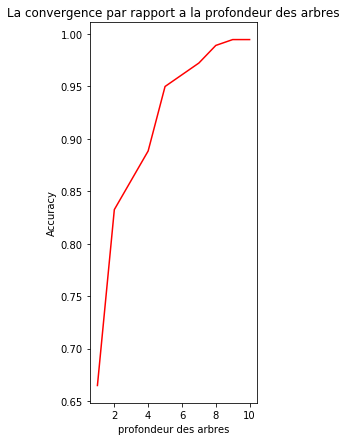

In [22]:
plt.plot(profs_arbres, foret_prof_conv, color="red")
plt.ylabel("Accuracy")
plt.xlabel("profondeur des arbres")
plt.title("La convergence par rapport a la profondeur des arbres")
plt.show()

### Analyse de la performance par rappor a la profondeur d'arbre : 
D'aprés le graphe on remarque que la performance augmente en augmentant la profondeur de l'arbre est arrivé au seuil 1 elle se stabilise (environs profondeur 9 dans notre cas) 


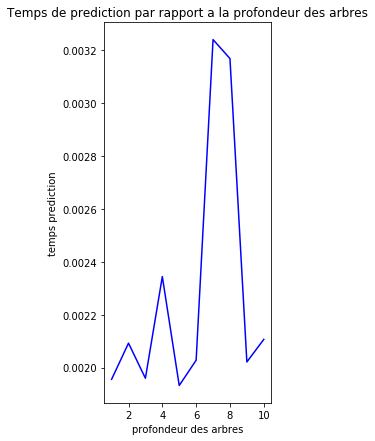

In [23]:
# Le temps de prédication
plt.plot(profs_arbres, foret_prof_temps_test, color="blue")
plt.ylabel("temps prediction")
plt.xlabel("profondeur des arbres")
plt.title("Temps de prediction par rapport a la profondeur des arbres")
plt.show()

### Analyse du temps de prédiction par rappor a la profondeur d'arbre : 
D'aprés le graphe on remarque que le temps de prédiction augmente en augmentant la profondeur de l'arbre est arrivé a un certain seuil il rediminue


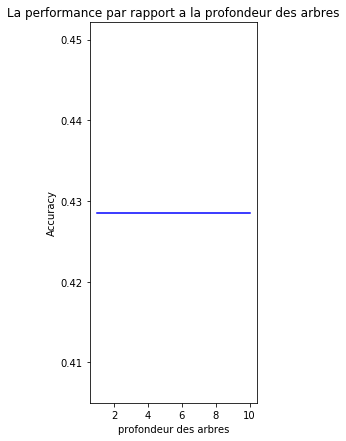

In [24]:
plt.plot(profs_arbres, foret_prof_perf, color="blue")
plt.ylabel("Accuracy")
plt.xlabel("profondeur des arbres")
plt.title("La performance par rapport a la profondeur des arbres")
plt.show()

### Analyse  de la performance du model random forest par rapport a la profondeur de ses arbres: 
La profondeur de l'arbre n'influe pas sur la performance de Random Forest, on prend le résultat/moyenne de la majorité des arbres, il est inutile d'avoir des arbres complexes et profonds.

## III- Forêt aléatoire (Regression)

Dans la regression, les arbres de décision essayent de minimiser l'écart-type de chaque ensemble. Donc, le critère de diversité c'est l'écart-type (à la place de gini pour le classement). Dans scikit-learn, on utilise la mesure d'erreur MSE (mean squared error), qui est simulaire à la variance.

### III-1- Préparation des données

Nous utilisons le dataset [Medical Cost Personal Datasets: Insurance Forecast by using Linear Regression](https://www.kaggle.com/mirichoi0218/insurance). 



In [25]:
insurance = pd.read_csv('./datasets/insurance.csv') 
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
# Les arbres peuvent travailler avec des des caractéristiques nominales
# ces transformtions sont pour la regression linéaire
insurance2 = pd.get_dummies(insurance, prefix=["sex", "region"], columns = ["sex", "region"])
insurance2["smoker"] = np.array(insurance2["smoker"] == "yes").astype(int)
cols = insurance2.columns.tolist()
cols.insert(0, cols.pop(cols.index("charges")))
insurance2 = insurance2.reindex(columns= cols)

X_insurence2 = insurance2.iloc[:, 1:].values  
Y_insurence2 = insurance2.iloc[:, 0].values 


insurance2.head()

,charges,age,bmi,children,smoker,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,16884.92400,19,27.900,0,1,1,0,0,0,0,1
1,1725.55230,18,33.770,1,0,0,1,0,0,1,0
2,4449.46200,28,33.000,3,0,0,1,0,0,1,0
3,21984.47061,33,22.705,0,0,0,1,0,1,0,0
4,3866.85520,32,28.880,0,0,0,1,0,1,0,0


### III-2- Entraînement et test

Nous entraînons deux modèles des arbres de décision avec [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) de scikit-learn : 
- *cart_onehot* : les paramètres par défaut de scikit-learn (MSE et 2 échantillons min dans une feuille)
- *cart7_onehot* : MSE par défaut, et nous avons fixé la profondeur max par 7

Aussi, nous utilisons [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) pour entrainer un modèle : 
- *foret_onehot* : MSE par défaut, 100 arbres dans le forêt

En plus, on veut comparer les forêts avec la regression linéaire : 
- *reglin_onehot* : Le modèle est [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)



In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

NBR_RUN_3 = 7

temps_train_3 = {
    "cart_onehot" : [],
    "cart7_onehot": [],
    "foret_onehot": [],
    "reglin_onehot": []
}

conv_3 = {# pour tester la convergence du modèle
    "cart_onehot" : [],
    "cart7_onehot": [],
    "foret_onehot": [],
    "reglin_onehot": []
}


temps_test_3 = {
    "cart_onehot" : [],
    "cart7_onehot": [],
    "foret_onehot": [],
    "reglin_onehot": []
}


perf_3 = {# pour tester la performance sur des données de test
    "cart_onehot" : [],
    "cart7_onehot": [],
    "foret_onehot": [],
    "reglin_onehot": []
}


# cette fonction utilise les variables globales ci-avant
def evaluer2(nom_modele, modele, X_train, Y_train, X_test, Y_test):
    # temps entrainement
    temps_debut = timeit.default_timer()
    modele.fit(X_train, Y_train)
    temps_train_3[nom_modele].append(timeit.default_timer() - temps_debut)
    
    # converence
    Y_modele_train = modele.predict(X_train)
    conv_3[nom_modele].append(MSE(Y_train, Y_modele_train))
    
    # temps de test
    temps_debut = timeit.default_timer()
    Y_modele_test = modele.predict(X_test)
    temps_test_3[nom_modele].append(timeit.default_timer() - temps_debut)
    
    # performance
    perf_3[nom_modele].append(MSE(Y_test, Y_modele_test))
    
    

for run in range(NBR_RUN_3): 
    
    # données onehot
    X_train, X_test, Y_train, Y_test = train_test_split(X_insurence2, Y_insurence2, test_size=0.3)
    
    cart_3 = DecisionTreeRegressor() # un regresseur CART
    evaluer2("cart_onehot", cart_3, X_train, Y_train, X_test, Y_test)
    
    cart7_3 = DecisionTreeRegressor(max_depth=7) # un regresseur CART avec profondeur max de 7
    evaluer2("cart7_onehot", cart7_3, X_train, Y_train, X_test, Y_test)
    
    foret = RandomForestRegressor(n_estimators=100, random_state=0) # un regresseur de foret avec 100 arbres
    evaluer2("foret_onehot", foret, X_train, Y_train, X_test, Y_test)
    
    rl = LinearRegression() # un regresseur linéaire
    evaluer2("reglin_onehot", rl, X_train, Y_train, X_test, Y_test)
    
    
    
print("FIN EVALUATION")

FIN EVALUATION


### III-3- Analyse de l'étape d'entrainement

**Analyser les résultats ci-après**
- Temps d'entraînement (min is best)
- Le coût d'entraînement (min is best)

Ici, nous avons dessiné les métriques par rapport aux runs. 
L'ordre des runs n'est pas important.
Le plus important c'est que un modèle doit être stable par rapport un autre sur les différents runs


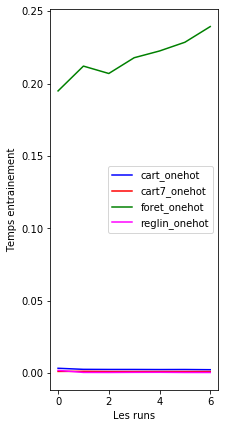

In [32]:
#pd.DataFrame(temps_train_3)

plt.plot(range(NBR_RUN_3), temps_train_3["cart_onehot"], color="blue", label="cart_onehot")
plt.plot(range(NBR_RUN_3), temps_train_3["cart7_onehot"], color="red", label="cart7_onehot")
# le temps d'entrainement des forets est telement grand, on ne peut pas comparer entre les autres
plt.plot(range(NBR_RUN_3), temps_train_3["foret_onehot"], color="green", label="foret_onehot")
plt.plot(range(NBR_RUN_3), temps_train_3["reglin_onehot"], color="magenta", label="reglin_onehot")
plt.ylabel("Temps entrainement")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

### Temps d'entrainement: 
> celui de CART est le plus grand, suivi de CART7 et enfin la regression linéaire. Ceci s'explique par le nombre d'opérations à effectuer pour chaque algorithme. 


> Le temps d'entrainement de Random forest est beaucoup plus important que celui des 3 autres algorithmes car il consiste à entrainer plusieurs arbres.

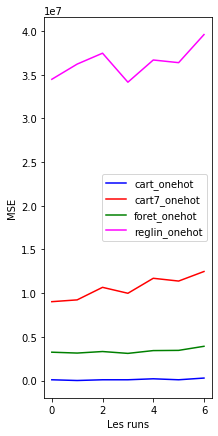

In [29]:
# Le coût d'entraînement
#pd.DataFrame(conv_3)

plt.plot(range(NBR_RUN_3), conv_3["cart_onehot"], color="blue", label="cart_onehot")
plt.plot(range(NBR_RUN_3), conv_3["cart7_onehot"], color="red", label="cart7_onehot")
plt.plot(range(NBR_RUN_3), conv_3["foret_onehot"], color="green", label="foret_onehot")
plt.plot(range(NBR_RUN_3), conv_3["reglin_onehot"], color="magenta", label="reglin_onehot")
plt.ylabel("MSE")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

## Cout d'entrainement : 
> CART a un cout nul pour les données de test, car il a une entropie nulle au niveau des feuilles d'ou un probléme d'overfiting.

> Random forest a un cout  plus important, suivi de CART7. Random forest arrive a mieux connaitre les données.  

> la regression linéaire est moins efficace dans ce cas.

### III-4- Analyse de l'étape de test

**Analyser les résultats ci-après**
- Temps de test 
- Le coût de test (l'erreur en utilisant MSE)

Ici, nous avons dessiné les métriques par rapport aux runs. 
L'ordre des runs n'est pas important.
Le plus important c'est que un modèle doit être stable par rapport un autre sur les différents runs

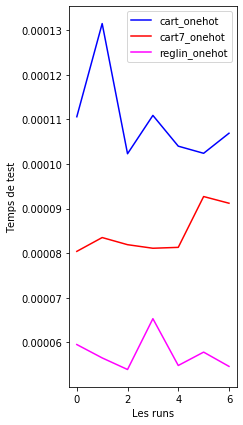

In [30]:
# Le temps de test 
# pd.DataFrame(temps_test_3)

plt.plot(range(NBR_RUN_3), temps_test_3["cart_onehot"], color="blue", label="cart_onehot")
plt.plot(range(NBR_RUN_3), temps_test_3["cart7_onehot"], color="red", label="cart7_onehot")
# le temps de test des forets est telement grand, on ne peut pas comparer entre les autres
#plt.plot(range(NBR_RUN_3), temps_test_3["foret_onehot"], color="green", label="foret_onehot")
plt.plot(range(NBR_RUN_3), temps_test_3["reglin_onehot"], color="magenta", label="reglin_onehot")
plt.ylabel("Temps de test")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

### Temps de test :
> Le temps de test de CART est le plus grand, suivi de CART7 et enfin la regression linéaire. Ceci s'explique par le nombre d'opérations à effectuer pour chaque algorithme.  

>Le temps de test de Random forest est beaucoup plus important que celui des 3 autres algorithmes car il teste  plusieurs arbres avant de prendre une décision.

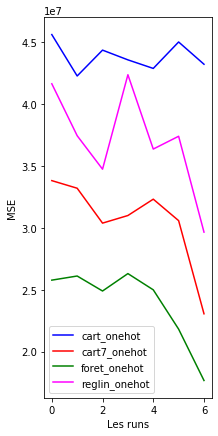

In [31]:
# Le cout de test
#pd.DataFrame(perf_3)

plt.plot(range(NBR_RUN_3), perf_3["cart_onehot"], color="blue", label="cart_onehot")
plt.plot(range(NBR_RUN_3), perf_3["cart7_onehot"], color="red", label="cart7_onehot")
plt.plot(range(NBR_RUN_3), perf_3["foret_onehot"], color="green", label="foret_onehot")
plt.plot(range(NBR_RUN_3), perf_3["reglin_onehot"], color="magenta", label="reglin_onehot")
plt.ylabel("MSE")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

## cout de test : 
> Random forest a le cout le moins élevé, c'est l'algorithme le plus efficace. Suivi de CART7, ceci est du à la capacité de ces algorithmes à ne pas overfitter les données de tests, contrairement à CART qui donne les pires résultats.  


> La regression linéaire est moins performante que Random forest, mais plus performante que CART.